In [6]:
from collections import deque
from graphviz import Digraph

In [ ]:
class Graph:
    def __init__(self, edges) -> None:
        self.edges = edges
        self.graph_dict = {}
        self.graph_nodes = set()
        for s, d in edges:
            if s in self.graph_dict:
                self.graph_dict[s].append(d)
                self.graph_nodes.add(s)
                self.graph_nodes.add(d)
            else:
                self.graph_dict[s] = [d]
    
    def make_graph(self):
        dot = Digraph(format='svg',graph_attr={'rankdir':'LR'})
        for node in self.graph_nodes:
            dot.node(node,node)
        for s in self.graph_dict:
            for d in self.graph_dict[s]:
                dot.edge(s,d)
        return dot
        
    def get_paths(self, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
        if start not in self.graph_dict:
            return []
        paths = []
        for node in self.graph_dict[start]:
            if node not in path:
                new_paths = self.get_paths(node, end, path)
                for p in new_paths:
                    paths.append(p)
        return paths

    def bfs(self, start):
        queue = deque([start])
        visited = set([start])
        
        while queue:
            curr = queue.popleft()
            print(curr, end=" ")
            if curr in self.graph_dict:
                for neighbour in self.graph_dict[curr]:
                    if neighbour not in visited:
                        visited.add(neighbour)
                        queue.append(neighbour)

    def dfs(self, start):
        stack = [start]
        visited = set([start])
        while stack:
            curr = stack.pop()
            print(curr,end=" ")
            if curr in self.graph_dict:
                for neighbour in self.graph_dict[curr]:
                    if neighbour not in visited:
                        visited.add(neighbour)
                        stack.append(neighbour)

In [39]:
edges = [
        ("A", "B"),
        ("A", "C"),
        ("B", "D"),
        ("B", "E"),
        ("C", "F"),
        ("E", "F"),
        ("E", "G"),
        ("F", "G"),
    ]

graph = Graph(edges)
start, end = 'A', 'F'
print(f"Paths for {start} to {end}:\n",graph.get_paths("A", "F"))
print('\n')
node = 'A'
print(f"BFS from {node}:")
graph.bfs(node)  
print("\n")
print(f"DFS from {node}:")
graph.dfs(node)

Paths for A to F:
 [['A', 'B', 'E', 'F'], ['A', 'C', 'F']]


BFS from A:
A B C D E F G 

DFS from A:
A C F G B E D 

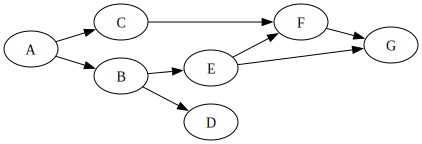

In [9]:
graph.make_graph()